In [1]:
# import pystan
# model_code = 'parameters {real y;} model {y ~ normal(0,1);}'
# model = pystan.StanModel(model_code=model_code)
# y = model.sampling().extract()['y']
# y.mean()  # with luck the result will be near 0

In [2]:
# curl -L https://github.com/unit8co/amld2022-forecasting-and-metalearning/blob/main/data/m3_dataset.xls\?raw\=true -o m3_dataset.xls
# curl -L https://github.com/unit8co/amld2022-forecasting-and-metalearning/blob/main/data/passengers.pkl\?raw\=true -o passengers.pkl
# curl -L https://github.com/unit8co/amld2022-forecasting-and-metalearning/blob/main/data/m4_monthly_scaled.pkl\?raw\=true -o m4_monthly_scaled.pkl

In [3]:
import pandas as pd
from darts import TimeSeries

# Read a pandas DataFrame
df = pd.read_csv('AirPassengers.csv', delimiter=",")

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, 'Month', '#Passengers')

# Set aside the last 36 months as a validation series
train, val = series[:-36], series[-36:]

In [4]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

C:\Users\johnw\miniconda3\envs\darts\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


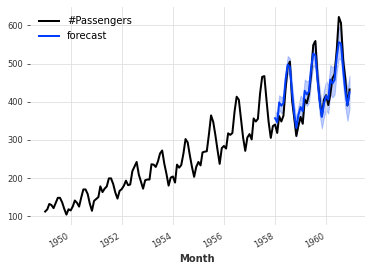

In [5]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend();